In [1]:
import nltk
import re
import random as rd
import numpy as np
import pprint as pp
from nltk.corpus import brown as corpus
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

# <h1><center>TOPIC MODEL</center></h1>
# <h1><center>LATENT DIRICHLET ALLOCATION (LDA) USING GIBBS SAMPLING</center></h1>

## Text Data Preprocessing

In [2]:
from nltk.corpus import brown
doc_names = ['ca01', 'ca02', 'ca03', 'ca04', 'ca05', 'ca06', 'ca07', 'ca08', 'ca09', 'ca10', 'ca11', 'ca12', 'ca13', 'ca14', # news
             'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'ch17', 'ch18', 'ch19', 'ch20', 'ch21', 'ch22', 'ch23', # government
             'cd02', 'cd03', 'cd04', 'cd05', 'cd06', 'cd07', 'cd08', 'cd09', 'cd10', 'cd11', 'cd12', 'cd13', 'cd14', 'cd15',# religion
             'cp12', 'cp13', 'cp14', 'cp15', 'cp16', 'cp17', 'cp18', 'cp19', 'cp20', 'cp21', 'cp22', 'cp23', 'cp24', 'cp25', 'cp26', 'cp27',# romance
             'cj01', 'cj02', 'cj03', 'cj04', 'cj05', 'cj06', 'cj07', 'cj08', 'cj09', 'cj10', 'cj11', 'cj12', 'cj13', 'cj14', # science
            ]
rd.shuffle(doc_names)
print(doc_names)
#brown.words(fileids=['cg22', 'cg01'])
#print(brown.fileids())

['ch11', 'cp21', 'cp18', 'cp23', 'ch22', 'cj01', 'cp22', 'ch16', 'ch17', 'cj09', 'cd07', 'ch21', 'cp19', 'ch15', 'cd13', 'cd06', 'cp16', 'ch13', 'cd02', 'ca07', 'cj14', 'cp20', 'cd09', 'ch14', 'cd14', 'cj13', 'cp26', 'cj03', 'cd15', 'cd12', 'ca14', 'cp25', 'ca12', 'ca04', 'cj02', 'ca08', 'cj08', 'ca01', 'cd11', 'ca02', 'cp24', 'cd03', 'cd04', 'cp12', 'cj05', 'ca06', 'ca03', 'ca09', 'ch10', 'ca13', 'ca05', 'cd08', 'ch18', 'cj06', 'cj12', 'cd10', 'ca10', 'cp14', 'ch12', 'cp15', 'cp17', 'ch19', 'cp27', 'cp13', 'ch23', 'ch20', 'cj10', 'cj11', 'cj07', 'cj04', 'cd05', 'ca11']


In [3]:
categories = {'ca':'news', 'ch':'gov', 'cd':'religion', 'cp':'romance', 'cj':'science'}

In [4]:
def load_corpus_genre(doc_names):
    return [brown.words(fileids = [doc_name]) for doc_name in doc_names]

In [5]:
def load_corpus(range_str):
    m = re.match(r'(\d+):(\d+)$', range_str)
    if m:
        start = int(m.group(1))
        end = int(m.group(2))
        return [corpus.words(fileid) for fileid in corpus.fileids()[start:end]]

In [6]:
stopwords_list1 = nltk.corpus.stopwords.words('english')
stopwords_list2 = "a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,able,about,above,according,accordingly,across,actually,after,afterwards,again,against,ain,t,all,allow,allows,almost,alone,along,already,also,although,always,am,among,amongst,an,and,another,any,anybody,anyhow,anyone,anything,anyway,anyways,anywhere,apart,appear,appreciate,appropriate,are,aren,t,around,as,aside,ask,asking,associated,at,available,away,awfully,be,became,because,become,becomes,becoming,been,before,beforehand,behind,being,believe,below,beside,besides,best,better,between,beyond,both,brief,but,by,c,mon,c,s,came,can,can,t,cannot,cant,cause,causes,certain,certainly,changes,clearly,co,com,come,comes,concerning,consequently,consider,considering,contain,containing,contains,corresponding,could,couldn,t,course,currently,definitely,described,despite,did,didn,t,different,do,does,doesn,t,doing,don,t,done,down,downwards,during,each,edu,eg,eight,either,else,elsewhere,enough,entirely,especially,et,etc,even,ever,every,everybody,everyone,everything,everywhere,ex,exactly,example,except,far,few,fifth,first,five,followed,following,follows,for,former,formerly,forth,four,from,further,furthermore,get,gets,getting,given,gives,go,goes,going,gone,got,gotten,greetings,had,hadn,t,happens,hardly,has,hasn,t,have,haven,t,having,he,he,s,hello,help,hence,her,here,here,s,hereafter,hereby,herein,hereupon,hers,herself,hi,him,himself,his,hither,hopefully,how,howbeit,however,i,d,i,ll,i,m,i,ve,ie,if,ignored,immediate,in,inasmuch,inc,indeed,indicate,indicated,indicates,inner,insofar,instead,into,inward,is,isn,t,it,it,d,it,ll,it,s,its,itself,just,keep,keeps,kept,know,knows,known,last,lately,later,latter,latterly,least,less,lest,let,let,s,like,liked,likely,little,look,looking,looks,ltd,mainly,many,may,maybe,me,mean,meanwhile,merely,might,more,moreover,most,mostly,much,must,my,myself,name,namely,nd,near,nearly,necessary,need,needs,neither,never,nevertheless,new,next,nine,no,nobody,non,none,noone,nor,normally,not,nothing,novel,now,nowhere,obviously,of,off,often,oh,ok,okay,old,on,once,one,ones,only,onto,or,other,others,otherwise,ought,our,ours,ourselves,out,outside,over,overall,own,particular,particularly,per,perhaps,placed,please,plus,possible,presumably,probably,provides,que,quite,qv,rather,rd,re,really,reasonably,regarding,regardless,regards,relatively,respectively,right,said,same,saw,say,saying,says,second,secondly,see,seeing,seem,seemed,seeming,seems,seen,self,selves,sensible,sent,serious,seriously,seven,several,shall,she,should,shouldn,t,since,six,so,some,somebody,somehow,someone,something,sometime,sometimes,somewhat,somewhere,soon,sorry,specified,specify,specifying,still,sub,such,sup,sure,t,s,take,taken,tell,tends,th,than,thank,thanks,thanx,that,that,s,thats,the,their,theirs,them,themselves,then,thence,there,there,s,thereafter,thereby,therefore,therein,theres,thereupon,these,they,they,d,they,ll,they,re,they,ve,think,third,this,thorough,thoroughly,those,though,three,through,throughout,thru,thus,to,together,too,took,toward,towards,tried,tries,truly,try,trying,twice,two,un,under,unfortunately,unless,unlikely,until,unto,up,upon,us,use,used,useful,uses,using,usually,value,various,very,via,viz,vs,want,wants,was,wasn,t,way,we,we,d,we,ll,we,re,we,ve,welcome,well,went,were,weren,t,what,what,s,whatever,when,whence,whenever,where,where,s,whereafter,whereas,whereby,wherein,whereupon,wherever,whether,which,while,whither,who,who,s,whoever,whole,whom,whose,why,will,willing,wish,with,within,without,won,t,wonder,would,would,wouldn,t,yes,yet,you,you,d,you,ll,you,re,you,ve,your,yours,yourself,yourselves,zero".split(',')
stopwords_list = list(set(stopwords_list1 + stopwords_list2))  
recover_list = {"wa":"was", "ha":"has"}
wl = nltk.WordNetLemmatizer()

In [7]:
def lemmatize(word):
    lem_word = wl.lemmatize(word.lower())
    if lem_word in recover_list: 
        return recover_list[lem_word]
    return lem_word

In [8]:
def process_term(term):
    proc_term = lemmatize(term)
    if not re.match(r'[a-z]+$', proc_term): 
        return None
    if excluds_stopwords and proc_term in stopwords_list: 
        return None

    return proc_term

In [9]:
def process_doc(doc):
    list = []
    for term in doc:
        proc_term = process_term(term)
        if proc_term != None:
            list.append(proc_term)
    return list

In [10]:
excluds_stopwords = True

In [11]:
#corpus = load_corpus('0:50')
corpus = load_corpus_genre(doc_names)
print(corpus[0])

['Another', 'recent', 'achievement', 'was', 'the', ...]


In [12]:
docs = [process_doc(doc) for doc in corpus]

In [13]:
vocabList = list(set(sum(docs, [])))
#dict: word : idx
vocabs = {vocabList[i] : i for i, word in enumerate(vocabList)}

## Algorithm

### Initialize variable

In [14]:
# configure lda hyperparameters
alpha = 0.5
beta = 0.5 

In [15]:
# congifure gibbs sampling
num_iters = 150 
burn_in = 2000
thin_interval = 100 
sample_lag = 10

In [16]:
# get vocabulary
V = len(vocabs)
# get number of documents
M = len(docs)
# get number of topics
K = 6
print("Vocabulary size: V =", V)
print("Number of documents: M =", M)
print("Number of topics: K =", K)

Vocabulary size: V = 11497
Number of documents: M = 72
Number of topics: K = 6


### Randomly assign topic to every words in every documents

In [17]:
topic_term_count = np.zeros((V, K), dtype=np.int)
doc_topic_count = np.zeros((M, K), dtype=np.int)
topic_term_sum = np.zeros(K, dtype=np.int)
doc_topic_sum = np.zeros(M, dtype=np.int)    
z = [np.array([])] * M

In [18]:
def initialize():
    for i, doc in enumerate(docs):
        z[i] = np.zeros(len(doc), dtype=np.int)
        doc_topic_sum[i] = len(doc)

        for j, word in enumerate(doc):
            topic = rd.randint(0, K - 1)
            z[i][j] = topic
            topic_term_count[vocabs[word], topic] += 1               
            doc_topic_count[i, topic] += 1
            topic_term_sum[topic] += 1

### Run Gibbs Sampling

In [19]:
def gibbs_sampling():
    for it in range(num_iters):
        for i, doc in enumerate(docs):
            for j, word in enumerate(doc):
                topic = z[i][j]
                topic_term_count[vocabs[word], topic] -= 1               
                topic_term_sum[topic] -= 1
                doc_topic_count[i, topic] -= 1
                doc_topic_sum[i] -= 1

                phi = (topic_term_count[vocabs[word]] + beta) / (topic_term_sum + V * beta)
                theta = (doc_topic_count[i] + alpha) / (doc_topic_sum[i] + K * alpha)
                p = phi * theta

                p_cum = np.cumsum(p)
                randVal = np.random.rand() * p_cum[-1]
                new_topic = int(np.where(p_cum > randVal)[0][0])

                topic_term_count[vocabs[word], new_topic] += 1               
                topic_term_sum[new_topic] += 1
                doc_topic_count[i, new_topic] += 1
                doc_topic_sum[i] += 1             

                z[i][j] = new_topic
    print("Done")

In [20]:
initialize()
gibbs_sampling()

Done


## Visualization

### Get document-topic distribution and topic-word distribution

In [3]:
# doc_topic distribution (M, K)
def get_theta(doc_topic_count, doc_topic_sum):
    a = doc_topic_count + alpha
    b = doc_topic_sum + K * alpha
    theta = (a / b[:, None])
    return theta

In [2]:
# topic_word distribution (K, V)
def get_phi(topic_term_count, topic_term_sum):
    a = topic_term_count + beta
    b = topic_term_sum + V * beta
    phi = a.T / b[:, None]
    return phi

### Visualize topic-word Distribution

In [23]:
def output_topic_word_dist(phi_matrix, num_top_words):
    for k in range(K):
        print("topic", k, ":", end = "")
        max_idx = np.argpartition(phi_matrix[k], -num_top_words)[-num_top_words:]
        max_idx_sort = max_idx[np.argsort(-phi_matrix[k][max_idx])]
        top_words = { vocabList[idx] : phi_matrix[k][idx] for idx in max_idx_sort }

        for w in sorted(top_words, key=top_words.get, reverse=True):
            #print (w, top_words[w])
            print(w + ", ", end = "")
        print()       

In [24]:
phi_matrix = get_phi(topic_term_count, topic_term_sum) #(K, V)
output_topic_word_dist(phi_matrix, num_top_words = 20)

topic 0 :af, temperature, surface, pressure, anode, atom, type, data, material, particle, cell, measurement, reaction, rate, effect, energy, activity, artery, small, radiation, 
topic 1 :game, john, du, year, motor, pont, league, linda, play, ball, run, snake, bobbie, general, length, stock, yard, hit, foot, record, 
topic 2 :church, god, world, christian, member, man, number, catholic, human, life, christ, england, membership, faith, death, fear, good, power, religious, history, 
topic 3 :back, thought, day, time, eye, thing, good, looked, hand, knew, phil, face, make, night, long, life, felt, made, head, told, 
topic 4 :shelter, station, age, forest, onset, completion, service, skywave, protection, area, figure, national, interference, class, center, period, girl, growth, mile, time, 
topic 5 :state, year, united, government, program, department, made, service, general, city, time, board, medical, plan, federal, president, project, act, million, report, 


In [56]:
def visualize_topic_word_dist(phi_matrix, num_top_words):
    fontsize_base = 50 / np.amax(phi_matrix)
    
    plt.figure(figsize=(16, 6))
    gs = gridspec.GridSpec(1, K) 
    
    for k in range(K):
        #plt.subplot(1, K, k + 1)
        plt.subplot(gs[k])
        plt.ylim(0, num_top_words + 0.5)
        plt.xlim(0, 20)
        plt.xticks([])
        plt.yticks([])
        plt.title('Topic #{}'.format(k))     
        max_idx = np.argpartition(phi_matrix[k], -num_top_words)[-num_top_words:]
        max_idx_sort = max_idx[np.argsort(-phi_matrix[k][max_idx])]
        top_words = { vocabList[idx] : phi_matrix[k][idx] for idx in max_idx_sort }

        for i, word in enumerate(sorted(top_words, key=top_words.get, reverse=True)):
            #print (w, top_words[w])
            plt.text(0.3, num_top_words-i-0.5, 
                     word, fontsize = fontsize_base*top_words[word]) 
    plt.tight_layout()
    plt.show()

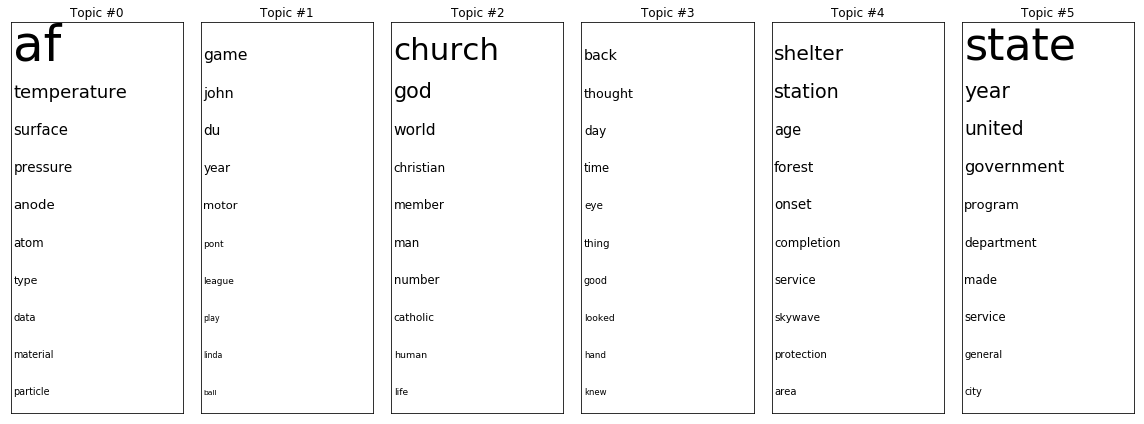

In [26]:
visualize_topic_word_dist(phi_matrix, num_top_words = 10)

### Visualize document-topic distribution

In [27]:
def visualize_doc_topic_dist(theta_matrix, doc_names):
    plt.figure(figsize=(15, 6))
    ind = np.arange(len(doc_names))
    doc_topic = theta_matrix[ind, :]
    #print(doc_topic)
    width = 0.5
    plots = []
    height_cumulative = np.zeros(len(doc_topic))
    
    for k in range(K):
        color = plt.cm.coolwarm(k/K, 1)
        if k == 0:
            p = plt.bar(ind, doc_topic[:, k], 
                        width, color = color)
        else:
            p = plt.bar(ind, doc_topic[:, k], 
                        width, bottom=height_cumulative, color=color)
        height_cumulative += doc_topic[:, k]
        plots.append(p)
    
    plt.ylim((0, 1))
    plt.ylabel('Topics')
    plt.title('Topics in Brown Corpus')
    x_names = [doc_names[i] + "\n" + categories[doc_names[i][:2]] for i in range(len(doc_names))] 
    plt.xticks(ind, x_names)
    plt.yticks(np.arange(0, 1, 10))
    topic_labels = ['Topic #{}'.format(k) for k in range(K)]
    plt.legend([p[0] for p in plots], topic_labels)
    plt.show()

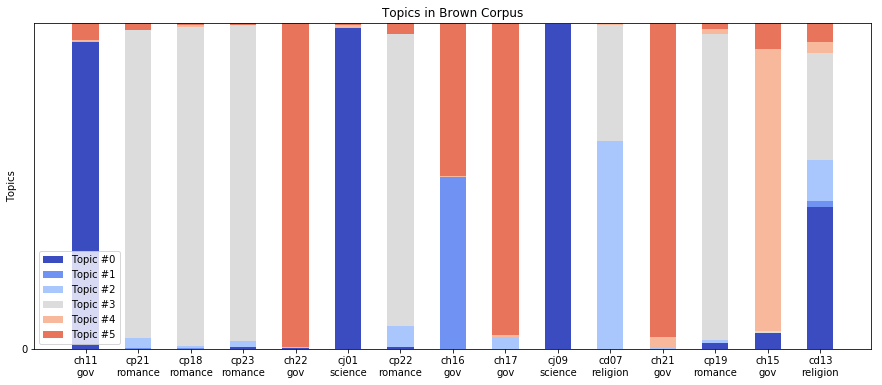

topic 0 :af, temperature, surface, pressure, anode, atom, type, data, material, particle, cell, measurement, reaction, 
topic 1 :game, john, du, year, motor, pont, league, linda, play, ball, run, snake, length, 
topic 2 :church, god, world, christian, member, man, number, catholic, human, life, christ, england, membership, 
topic 3 :back, thought, day, time, eye, thing, good, looked, hand, knew, phil, make, night, 
topic 4 :shelter, station, age, forest, onset, completion, service, skywave, protection, area, figure, national, interference, 
topic 5 :state, year, united, government, program, department, made, service, general, city, time, board, medical, 


In [28]:
theta_matrix = get_theta(doc_topic_count, doc_topic_sum) #(K, V)
visualize_doc_topic_dist(theta_matrix, doc_names[:15])
output_topic_word_dist(phi_matrix, num_top_words = 13)

## The role of LDA model hyperparameter
Alpha is a parameter of the prior distribution over topic weights in each document

Beta is a parameter of the prior distribution over word weights in each topic.

Alpha and gamma can be thought of as smoothing parameters when we compute how much each document "likes" a topic (alpha) or how much each topic "likes" a word (gamma)

### Alpha
    Low alpha: most of the weight in the topic distribution for this article goes to a single topic
    High alpha: the weight is much more evenly distributed across the topics.

#### alpha = 1, fix beta

In [29]:
alpha = 1
beta = 0.5 

In [30]:
topic_term_count = np.zeros((V, K), dtype=np.int)
doc_topic_count = np.zeros((M, K), dtype=np.int)
topic_term_sum = np.zeros(K, dtype=np.int)
doc_topic_sum = np.zeros(M, dtype=np.int)    
z = [np.array([])] * M

In [31]:
initialize()
gibbs_sampling()

Done


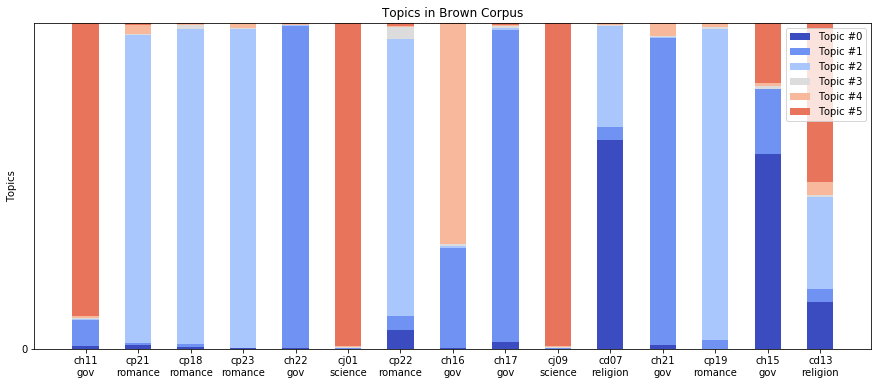

topic 0 :church, god, world, shelter, man, christian, member, human, catholic, life, artery, england, christ, 
topic 1 :state, year, united, government, program, department, service, made, board, city, time, medical, president, 
topic 2 :back, thought, day, thing, eye, time, looked, good, hand, knew, make, john, life, 
topic 3 :game, ball, phil, mike, league, play, run, eddie, deegan, year, hit, left, yard, 
topic 4 :station, number, du, forest, service, general, motor, skywave, pont, agent, class, interference, mile, 
topic 5 :af, temperature, pressure, anode, atom, data, figure, surface, radiation, material, cell, measurement, age, 


In [32]:
phi_matrix = get_phi(topic_term_count, topic_term_sum) #(K, V)
theta_matrix = get_theta(doc_topic_count, doc_topic_sum) #(K, V)
visualize_doc_topic_dist(theta_matrix, doc_names[:15])
output_topic_word_dist(phi_matrix, num_top_words = 13)

#### alpha = 50, fix beta

In [33]:
alpha = 50
beta = 0.5 

In [34]:
topic_term_count = np.zeros((V, K), dtype=np.int)
doc_topic_count = np.zeros((M, K), dtype=np.int)
topic_term_sum = np.zeros(K, dtype=np.int)
doc_topic_sum = np.zeros(M, dtype=np.int)    
z = [np.array([])] * M

In [35]:
initialize()
gibbs_sampling()

Done


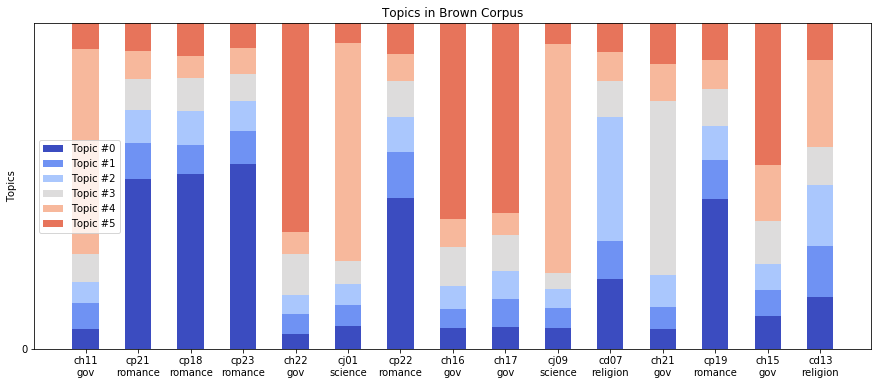

topic 0 :back, day, thought, time, thing, good, long, make, john, eye, put, looked, water, 
topic 1 :age, game, center, run, ball, year, phil, completion, foot, figure, growth, onset, length, 
topic 2 :church, world, god, number, man, member, christian, human, power, catholic, men, action, life, 
topic 3 :state, year, city, program, national, school, million, medical, president, work, force, system, federal, 
topic 4 :af, temperature, pressure, surface, anode, type, rate, material, atom, small, radiation, activity, data, 
topic 5 :united, government, state, general, made, time, service, board, shelter, station, act, section, claim, 


In [36]:
phi_matrix = get_phi(topic_term_count, topic_term_sum) #(K, V)
theta_matrix = get_theta(doc_topic_count, doc_topic_sum) #(K, V)
visualize_doc_topic_dist(theta_matrix, doc_names[:15])
output_topic_word_dist(phi_matrix, num_top_words = 13)

### Beta
    Low beta: higher weight placed on the top words and lower weight placed on the bottom words for each topic, 
    High beta: put less weight on the top words and more weight on the bottom words

#### fix alpha, beta = 0.5

In [37]:
alpha = 1
beta = 0.5 

In [38]:
topic_term_count = np.zeros((V, K), dtype=np.int)
doc_topic_count = np.zeros((M, K), dtype=np.int)
topic_term_sum = np.zeros(K, dtype=np.int)
doc_topic_sum = np.zeros(M, dtype=np.int)    
z = [np.array([])] * M

In [39]:
initialize()
gibbs_sampling()

Done


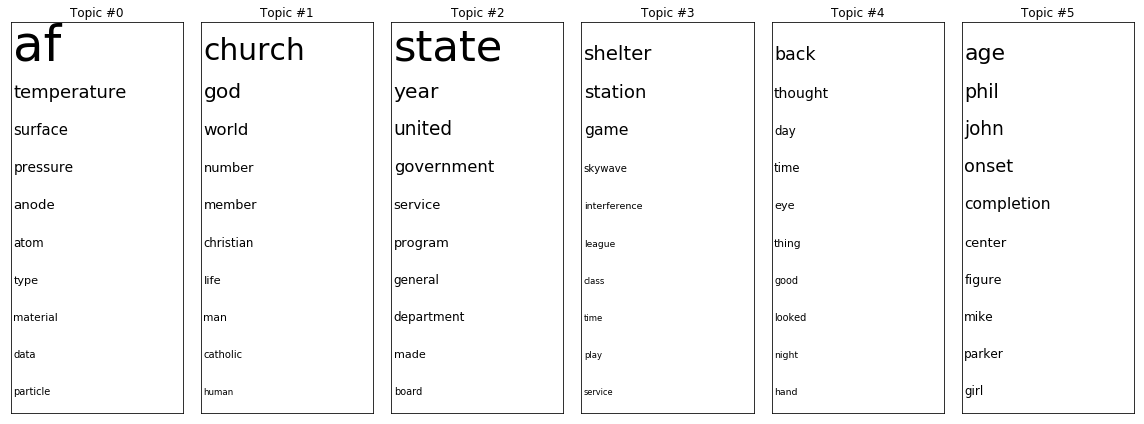

In [40]:
phi_matrix = get_phi(topic_term_count, topic_term_sum) #(K, V)
visualize_topic_word_dist(phi_matrix, num_top_words = 10)

#### fix alpha, beta = 0.01

In [41]:
alpha = 1
beta = 0.01

In [42]:
topic_term_count = np.zeros((V, K), dtype=np.int)
doc_topic_count = np.zeros((M, K), dtype=np.int)
topic_term_sum = np.zeros(K, dtype=np.int)
doc_topic_sum = np.zeros(M, dtype=np.int)    
z = [np.array([])] * M

In [43]:
initialize()
gibbs_sampling()

Done


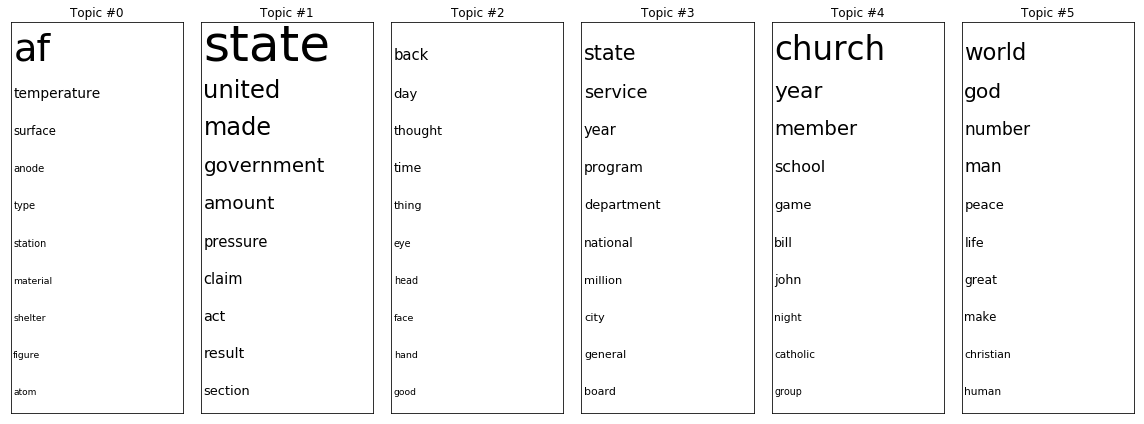

In [44]:
phi_matrix = get_phi(topic_term_count, topic_term_sum) #(K, V)
visualize_topic_word_dist(phi_matrix, num_top_words = 10)

### How to pick alpha and beta?
Alpha and beta parameters control the smoothness of the topic distributions for documents and word distributions for topics, but there's no simple conversion between smoothness of these distributions and quality of the topic model. 

In reality, there is no universally best choice for these parameters.

Griffiths and Steyvers (2004) suggest a value of 50/K (K = number of topics) for alpha and 200/W (W = number of words) for beta

Griffiths TL, Steyvers M (2004). “Finding Scientific Topics.” Proceedings of the National Academy of Sciences of the United States of America, 101, 5228–5235.